<a href="https://www.kaggle.com/code/anjusukumaran4/identifying-age-related-conditions-eda-rf?scriptVersionId=138042042" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [2]:
train = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')

## Train Data Exploration

In [3]:
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [4]:
print("Shape of train dataset : ",train.shape)
print("Shape of test dataset : ",test.shape)

Shape of train dataset :  (617, 58)
Shape of test dataset :  (5, 57)


In [5]:
train.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [7]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AB,617.0,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,3502.013221,2300.322717,192.593280,2197.345480,3120.318960,4361.637390,28688.187660
AH,617.0,118.624513,127.838950,85.200147,85.200147,85.200147,113.739540,1910.123198
AM,617.0,38.968552,69.728226,3.177522,12.270314,20.533110,39.139886,630.518230
AR,617.0,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.270880
AY,617.0,0.060320,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,10.566447,4.350645,3.396778,8.129580,10.461320,12.969516,38.971568
BC,617.0,8.053012,65.166943,1.229900,1.229900,1.229900,5.081244,1463.693448
BD,617.0,5350.388655,3021.326641,1693.624320,4155.702870,4997.960730,6035.885700,53060.599240


In [8]:
#analysing class column
train['Class'].value_counts()

0    509
1    108
Name: Class, dtype: int64

In [9]:
#checking for null values
train.isnull().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
FS        2
CB        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
EJ        0
DV        0
EP        0
EG        0
Id        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
BR        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BZ        0
AB        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

In [10]:
#filling null values with mean in numerical columns
train['EL']=train['EL'].fillna(train['EL'].mean())
train['BQ']=train['BQ'].fillna(train['BQ'].mean())
train['CC']=train['CC'].fillna(train['CC'].mean())
train['CB']=train['CB'].fillna(train['CB'].mean())
train['FS']=train['FS'].fillna(train['FS'].mean())
train['FL']=train['FL'].fillna(train['FL'].mean())
train['FC']=train['FC'].fillna(train['FC'].mean())
train['DU']=train['DU'].fillna(train['DU'].mean())
train['GL']=train['GL'].fillna(train['GL'].mean())

In [11]:
#no nullvalues
train.isnull().sum().sum()

0

In [12]:
#to find the unique values in column EJ
train['EJ'].unique()

array(['B', 'A'], dtype=object)

In [13]:
#converting categorical feature into numerical feature
train.EJ=train.EJ.map({'A':0,'B':1})

## EDA

<Axes: ylabel='Class'>

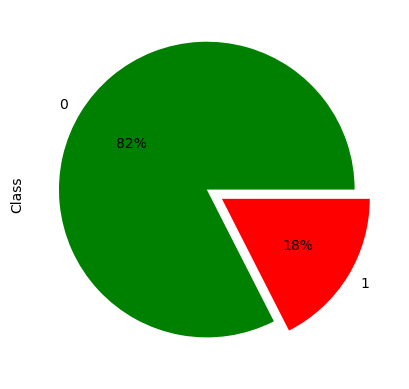

In [14]:
plot_df = train.Class.value_counts()
colors = ['green', 'red']
explode = (0.06,0.06)
plot_df.plot(kind="pie",colors=colors,explode=explode,autopct='%1.0f%%')

In [15]:
print("The Number of Samples in the dataset: ", len(train))
print('Class 0        :', round(train['Class'].value_counts()[0]
                                / len(train) * 100, 2), '% of the dataset')
 
print('Class 1 :', round(train['Class'].value_counts()[1]
                                / len(train) * 100, 2), '% of the dataset')

The Number of Samples in the dataset:  617
Class 0        : 82.5 % of the dataset
Class 1 : 17.5 % of the dataset


<Axes: >

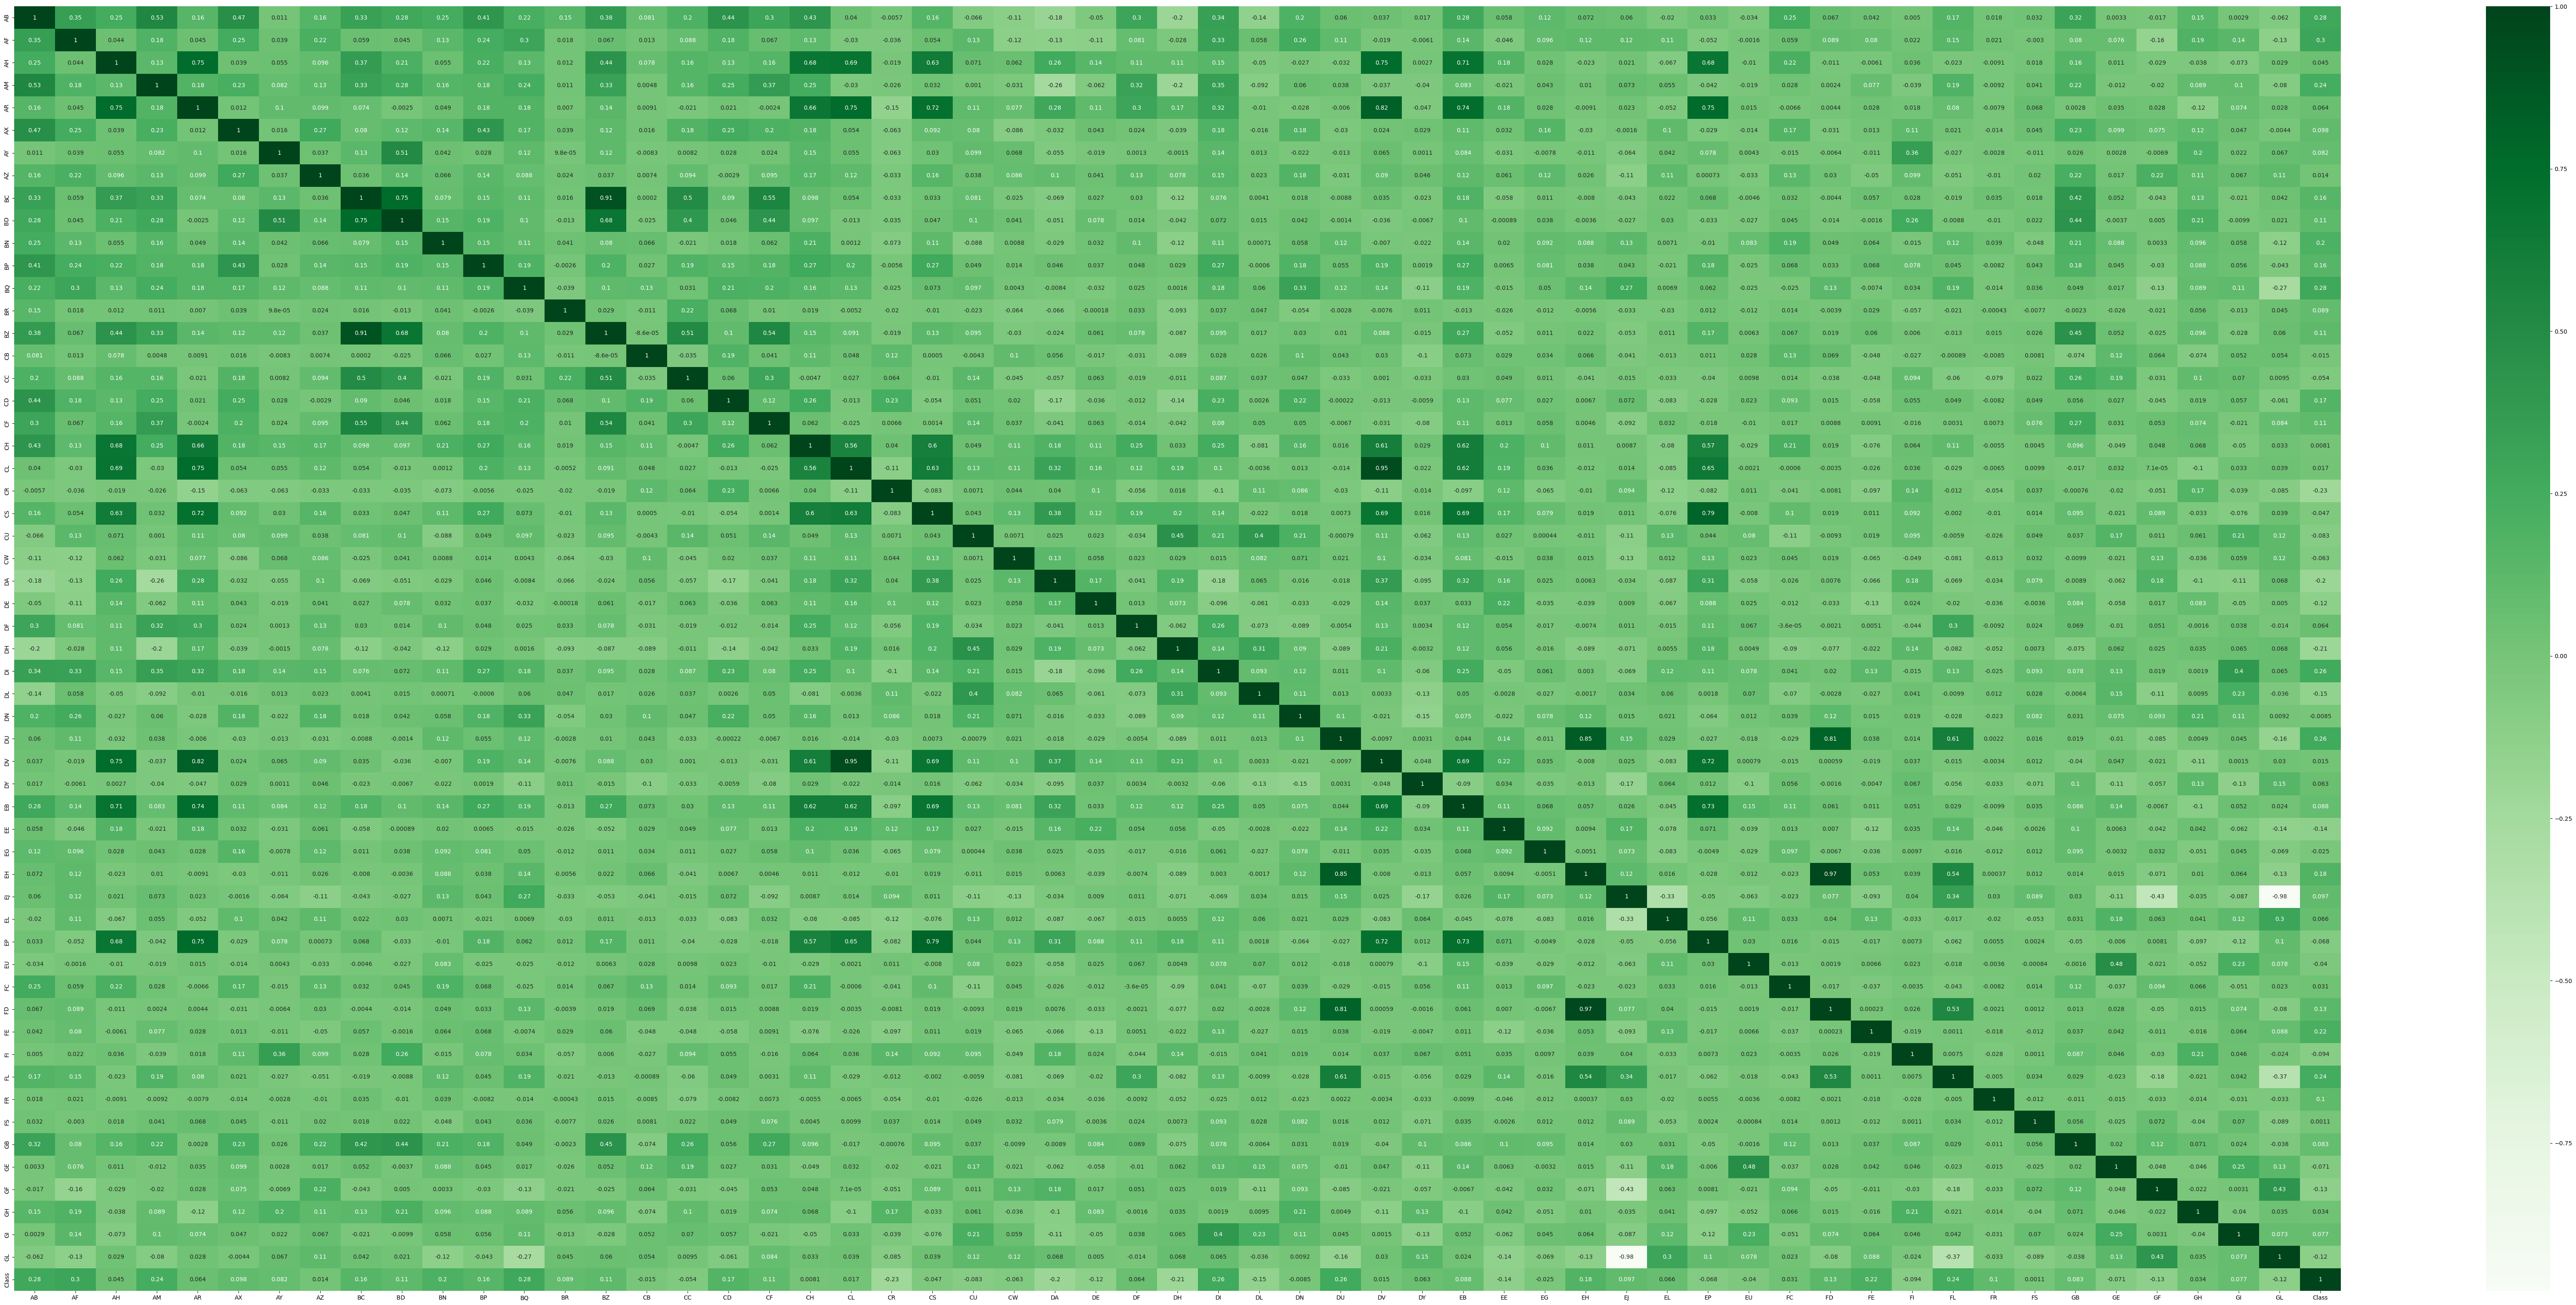

In [16]:
#coorelation heatmap
plt.figure(figsize=(90,40))
sns.heatmap(train.corr(),annot=True,cmap='Greens')

<Axes: >

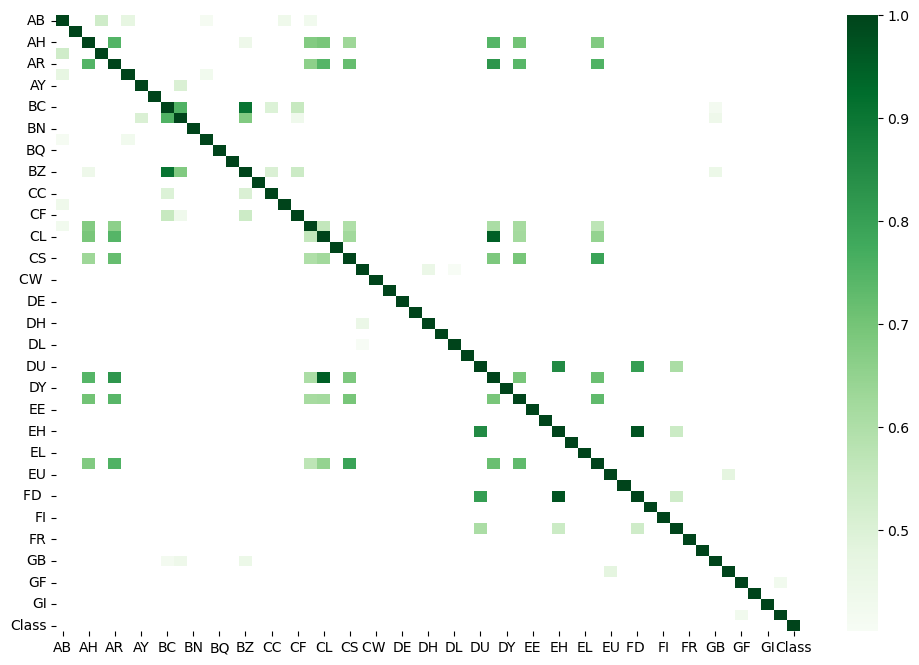

In [17]:
#plotting highly coorelated features
corr=train.corr()
kot = corr[corr>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [18]:
#to find the highly correlated features 
corr=train.corr()

high_corr_features=corr.index[abs(corr['Class'])>0.2]
print(f'highly correlated feature:\n',high_corr_features)
print(f'No. of highly correlated features:',len(high_corr_features))

highly correlated feature:
 Index(['AB', 'AF', 'AM', 'BQ', 'CR', 'DA', 'DH', 'DI', 'DU', 'FE', 'FL',
       'Class'],
      dtype='object')
No. of highly correlated features: 12


<Axes: xlabel='Class', ylabel='DE'>

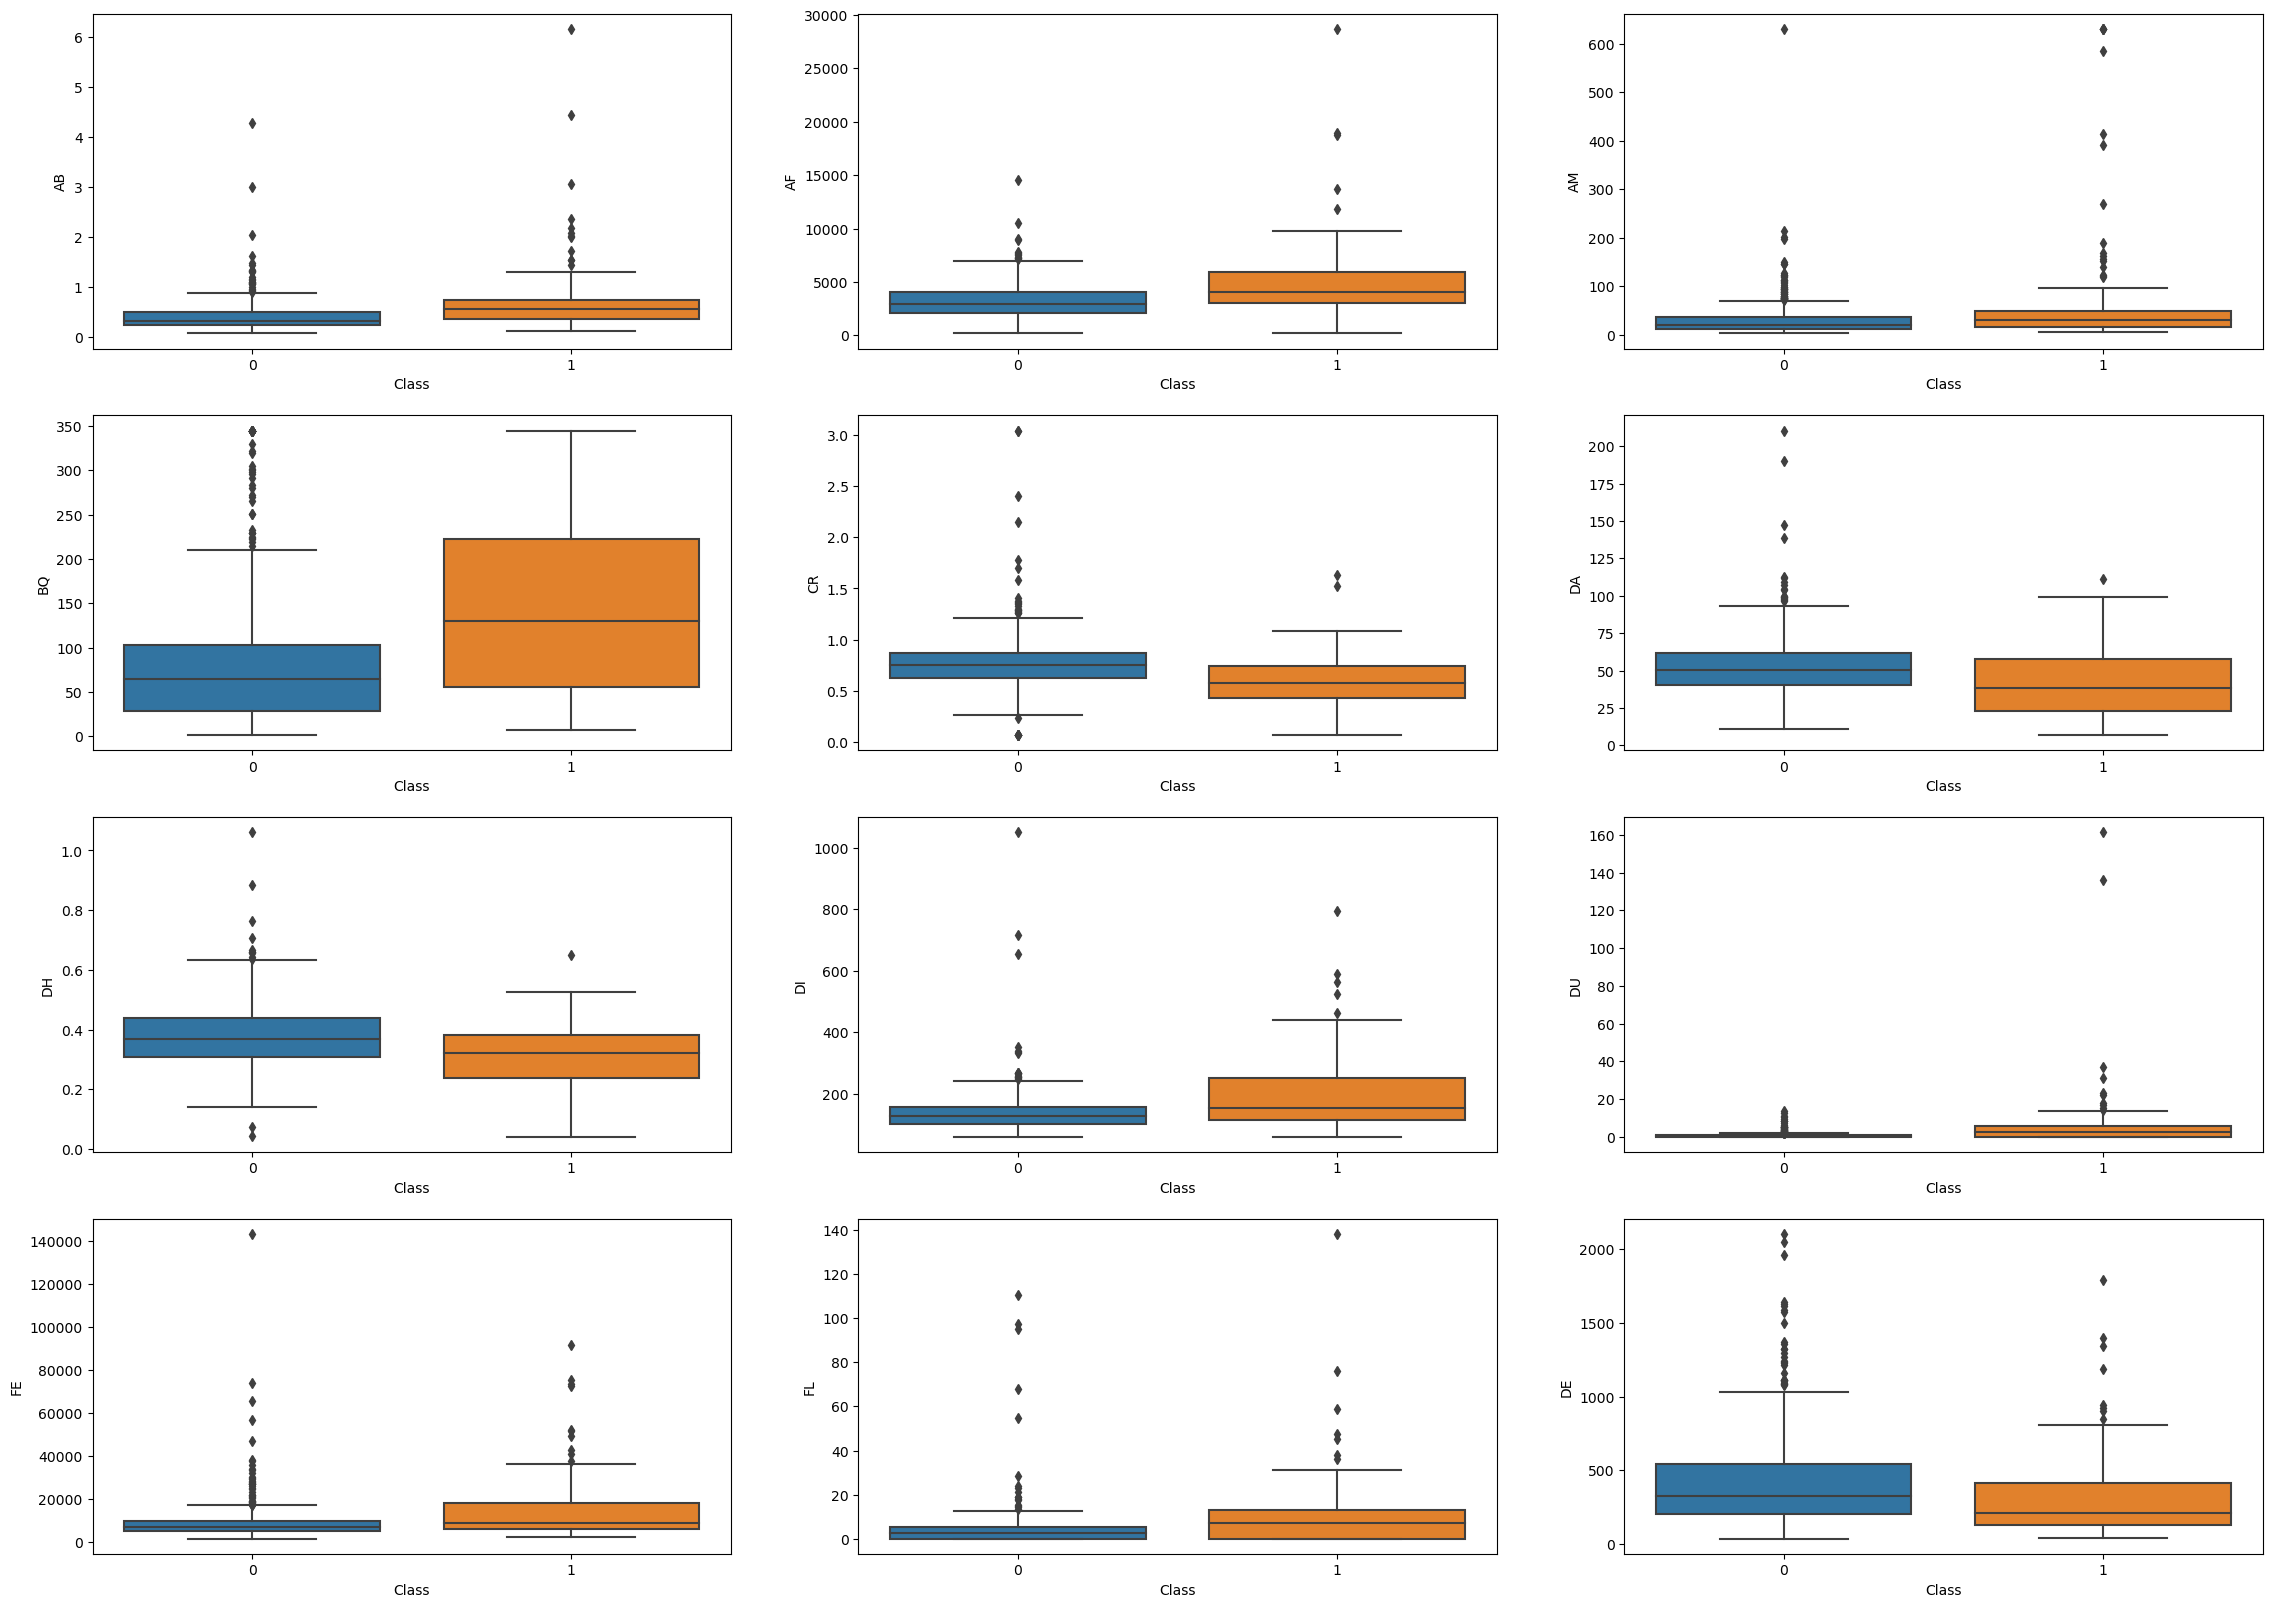

In [19]:
#plotting of highly correlated features in boxplot to see the distribution of data and outlier presence
fig, axes = plt.subplots(4, 3, figsize = (28,20))

sns.boxplot(ax = axes[0, 0], data = train, x = 'Class', y = 'AB')
sns.boxplot(ax = axes[0, 1], data = train, x = 'Class', y = 'AF')
sns.boxplot(ax = axes[0, 2], data = train, x = 'Class', y = 'AM')
sns.boxplot(ax = axes[1, 0], data = train, x = 'Class', y = 'BQ')
sns.boxplot(ax = axes[1, 1], data = train, x = 'Class', y = 'CR')
sns.boxplot(ax = axes[1, 2], data = train, x = 'Class', y = 'DA')
sns.boxplot(ax = axes[2, 0], data = train, x = 'Class', y = 'DH')
sns.boxplot(ax = axes[2, 1], data = train, x = 'Class', y = 'DI')
sns.boxplot(ax = axes[2, 2], data = train, x = 'Class', y = 'DU')
sns.boxplot(ax = axes[3, 0], data = train, x = 'Class', y = 'FE')
sns.boxplot(ax = axes[3, 1], data = train, x = 'Class', y = 'FL')
sns.boxplot(ax = axes[3, 2], data = train, x = 'Class', y = 'DE')

In [20]:
train_df=train.drop(['Class','Id'],axis=1)

## Removing Outliers

### Removing outliers using IQR 

The interquartile range IQR tells us the range where the bulk of the values lie. The interquartile range is calculated by subtracting the first quartile
from the third quartile. Unlike range, IQR tells where the majority of data lies and is thus preferred over range. It gives the central tendency of the data, that is why it is  used to identify outliers in a data set.

IQR = Q3 - Q1

Q1 is defined as the middle number between the smallest number and the median of the data set

Q2 is the median of the data

Q3 is the middle value between the median and the highest value of the data set


In [21]:
def removeOutliers(col):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    upper_array = np.where(train_df[col]>=upper)[0]
    lower_array = np.where(train_df[col]<=lower)[0]
    mean = train_df[((train_df[col] >= lower) | (train_df[col] <= upper))][col].mean()
    train_df.loc[((train_df[col] < lower) | (train_df[col] > upper)), col] = mean

In [22]:
#removing outliers
for i in train_df.columns:
    removeOutliers(i)

## Removing Duplicate values

In [23]:
def check_duplicate(df):
    if df.duplicated().all():
        return 'Duplicate data present in the DataFrame'
    else:
        return 'No duplicate data found'

In [24]:
check_duplicate(train)

'No duplicate data found'

In [25]:
#final_df
train_df.head()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,10.111079,7.298162,1.738550,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,10.358927,0.173229,0.497060,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,11.626917,7.709560,0.975560,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,14.852022,6.122162,0.497060,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.060320,3.396778,8.053012,5728.73412,...,13.666727,8.153058,3.533905,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614


## Test Data Exploration

In [26]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#checking for null values
test.isnull().sum().sort_values(ascending=False)

Id     0
DH     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
DI     0
DF     0
AB     0
DE     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
GL     0
dtype: int64

In [28]:
#converting categorical feature into numerical feature
test.EJ=test.EJ.map({'A':0,'B':1})

In [29]:
test_df=test.drop(['Id'],axis=1)

## Model Building

In [30]:
X=train_df
y=train['Class']

In [31]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=350,max_depth=15,random_state=42,min_samples_leaf=4)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=4, n_estimators=350,
                       random_state=42)

## Accuracy and Prediction

In [33]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [34]:
pred=rfc.predict(X_val)
a=accuracy_score(y_val,pred)
print("Accuracy Random Forest Classifier : ",round(accuracy_score(y_val,pred),4)*100, '%')

Accuracy Random Forest Classifier :  91.94 %


In [35]:
#classification report
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       106
           1       0.79      0.61      0.69        18

    accuracy                           0.92       124
   macro avg       0.86      0.79      0.82       124
weighted avg       0.91      0.92      0.92       124



#### This model is almost 92% accurate

In [36]:
rfc.fit(X,y)
preds = rfc.predict_proba(test_df)

In [37]:
submission = pd.DataFrame()
submission["Id"] = test.Id

submission["class_0"] = preds[:,0]
submission["class_1"] = preds[:,1]

In [38]:
submission.head()

,Id,class_0,class_1
0,00eed32682bb,0.531758,0.468242
1,010ebe33f668,0.531758,0.468242
2,02fa521e1838,0.531758,0.468242
3,040e15f562a2,0.531758,0.468242
4,046e85c7cc7f,0.531758,0.468242


In [39]:
submission.to_csv("submission.csv",header=True,index=False)